# (1) 데이터 가져오기
터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
여기에서 데이터를 상세히 확인할 수 있습니다.

In [1]:
# 터미널에서
# mkdir -p ~/aiffel/bike_sharing_demand/data
# ln -s ~/data/data/bike-sharing-demand/train.csv  ~/aiffel/bike_sharing_demand/data
import pandas as pd

train = pd.read_csv('~/aiffel/bike_sharing_demand/data/train.csv')
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
to_datetime 활용 : 링크 참조
pandas datetime extract year month day 키워드로 검색해 보기

In [2]:
train['datetime'] = pd.to_datetime(train['datetime']) # datetime 자료형으로 변환

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
sns.countplot 활용해서 시각화하기
subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

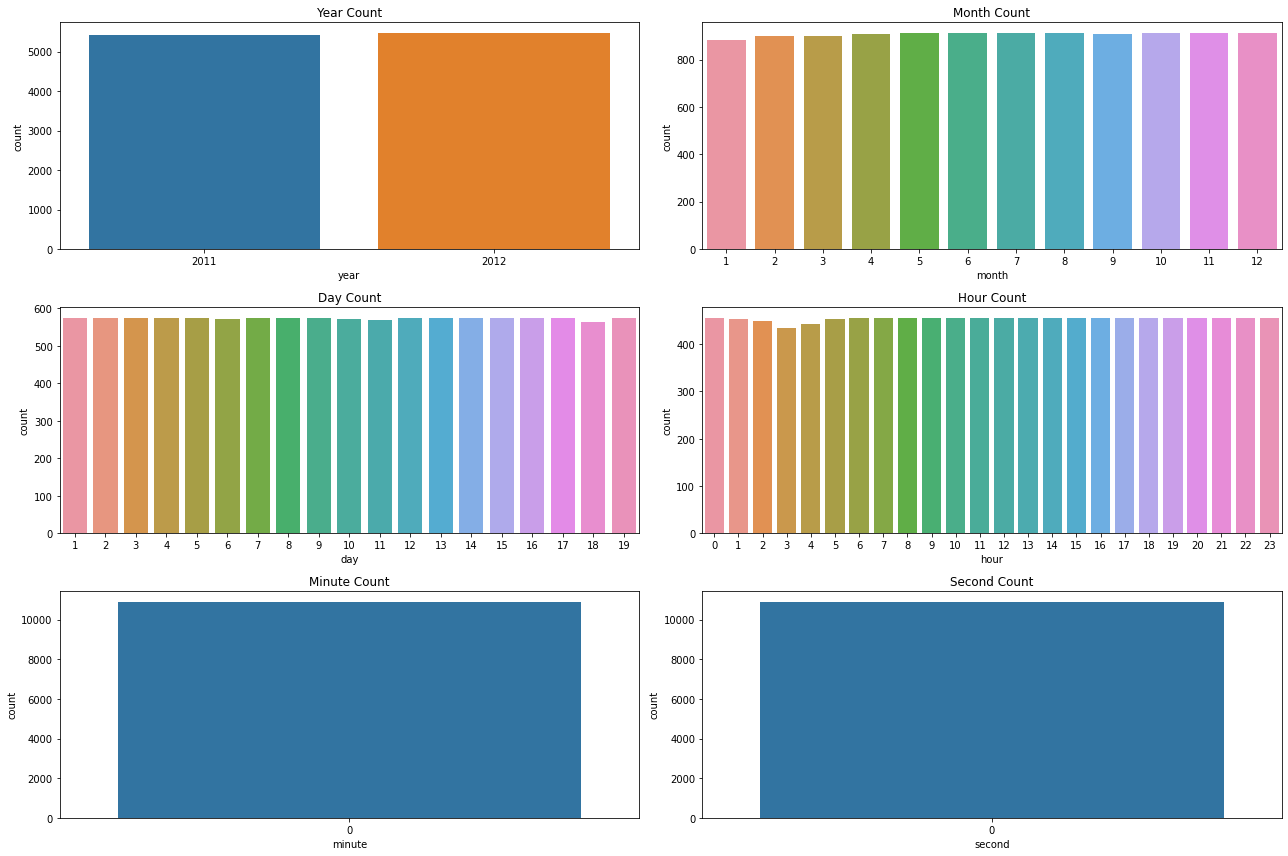

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))

plt.subplot(3, 2, 1)
sns.countplot(data=train, x='year') # year 데이터 개수 시각화
plt.title('Year Count')

plt.subplot(3, 2, 2)
sns.countplot(data=train, x='month') # month 데이터 개수 시각화
plt.title('Month Count')

plt.subplot(3, 2, 3)
sns.countplot(data=train, x='day') # day 데이터 개수 시각화
plt.title('Day Count')

plt.subplot(3, 2, 4)
sns.countplot(data=train, x='hour') # hour 데이터 개수 시각화
plt.title('Hour Count')

plt.subplot(3, 2, 5)
sns.countplot(data=train, x='minute') # minute 데이터 개수 시각화
plt.title('Minute Count')

plt.subplot(3, 2, 6)
sns.countplot(data=train, x='second') # second 데이터 개수 시각화
plt.title('Second Count')

plt.tight_layout() # 위 그래프의 x축 label과, 아래 그래프의 title이 겹쳐보여 따로 추가
plt.show()

# 4) X, y 컬럼 선택 및 train/test 데이터 분리
X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [4]:
from sklearn.model_selection import train_test_split

features = ['year', 'month', 'day', 'hour', 'minute', 'second', 
            'season', 'holiday', 'workingday', 'weather', 
            'temp', 'atemp', 'humidity', 'windspeed'] # casual, registered 컬럼 제외, count는 y 변수에 넣어야 해서 제외

X = train[features] # 새로 만든 열로 X 데이터 생성
y = train['count'] # count 값을 맞춰야 하므로, y에 count 컬럼

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (5) LinearRegression 모델 학습
sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # 선형 회귀 모델 불러오기 
model.fit(X_train, y_train) # train 데이터로 학습 시키기

LinearRegression()

# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
학습된 모델에 X_test를 입력해서 예측값 출력하기
모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
mse 값과 함께 rmse 값도 계산하기

In [6]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test) # 학습된 모델로 테스트 데이터에 대한 예측값 생성
mse = mean_squared_error(y_test, y_pred) # MSE 계산
rmse = mse ** (0.5) # RMSE 계산

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 19945.370053753973
RMSE: 141.22807813517102


# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

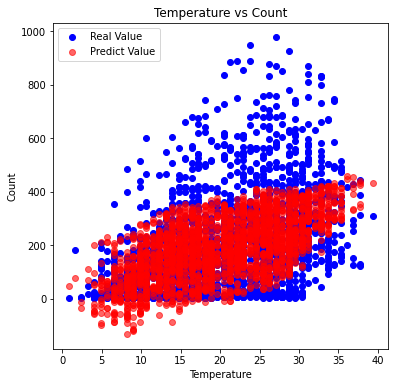

In [7]:
# temp를 x축, count를 y축으로 한 그래프 시각화
plt.figure(figsize=(6, 6))

plt.scatter(X_test['temp'], y_test, color='blue', label='Real Value')
plt.scatter(X_test['temp'], y_pred, color='red', alpha=0.6, label='Predict Value')
plt.title('Temperature vs Count')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend()

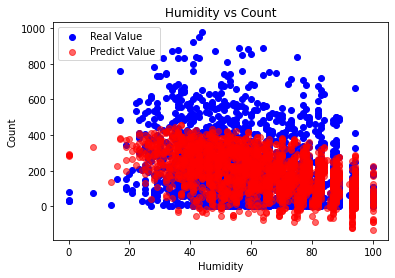

In [8]:
# humidity를 x축, count를 y축으로 한 그래프 시각화

plt.scatter(X_test['humidity'], y_test, color='blue', label='Real Value')
plt.scatter(X_test['humidity'], y_pred, color='red', alpha=0.6, label='Predict Value')
plt.title('Humidity vs Count')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.legend()